## calculer stand et bike en lier some=stand +bike

In [15]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'merge_bike_44_weather_data_filtered.csv'
data = pd.read_csv(file_path)
# prepa de data
data['timestamp'] = pd.to_datetime(data['timestamp'], format='mixed', errors='coerce')
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data_cleaned = data.drop(columns=['timestamp'])
X = data_cleaned.drop(columns=['available_bikes'])  
y = data_cleaned['available_bikes']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
#(nombre , 1 , nombre feature)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = models.Sequential([
    layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 1, 16)             192       
                                                                 
 flatten_11 (Flatten)        (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                1088      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:

print("Training the model...")
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False)

predictions = model.predict(X_test)

y_test_original = scaler_y.inverse_transform(y_test) 
y_pred = scaler_y.inverse_transform(predictions)   
total_bike_stands = data['available_bike_stands'] + data['available_bikes']  
total_bike_stands = total_bike_stands.iloc[0]  
y_pred_stands = total_bike_stands - y_pred  
y_test_stands = total_bike_stands - y_test_original 


Training the model...


Epoch 1/10
62/62 [==============================] - 1s 17ms/step - loss: 0.0019 - mae: 0.0340 - val_loss: 0.0025 - val_mae: 0.0351
Epoch 2/10
62/62 [==============================] - 1s 12ms/step - loss: 0.0019 - mae: 0.0336 - val_loss: 0.0025 - val_mae: 0.0349
Epoch 3/10
62/62 [==============================] - 1s 14ms/step - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0024 - val_mae: 0.0347
Epoch 4/10
62/62 [==============================] - 1s 12ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 0.0024 - val_mae: 0.0346
Epoch 5/10
62/62 [==============================] - 1s 14ms/step - loss: 0.0018 - mae: 0.0327 - val_loss: 0.0024 - val_mae: 0.0344
Epoch 6/10
62/62 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0325 - val_loss: 0.0024 - val_mae: 0.0343
Epoch 7/10
62/62 [==============================] - 1s 20ms/step - loss: 0.0018 - mae: 0.0322 - val_loss: 0.0024 - val_mae: 0.0342
Epoch 8/10
62/62 [==============================] - 1s 13ms/step - loss: 0.0017 - m

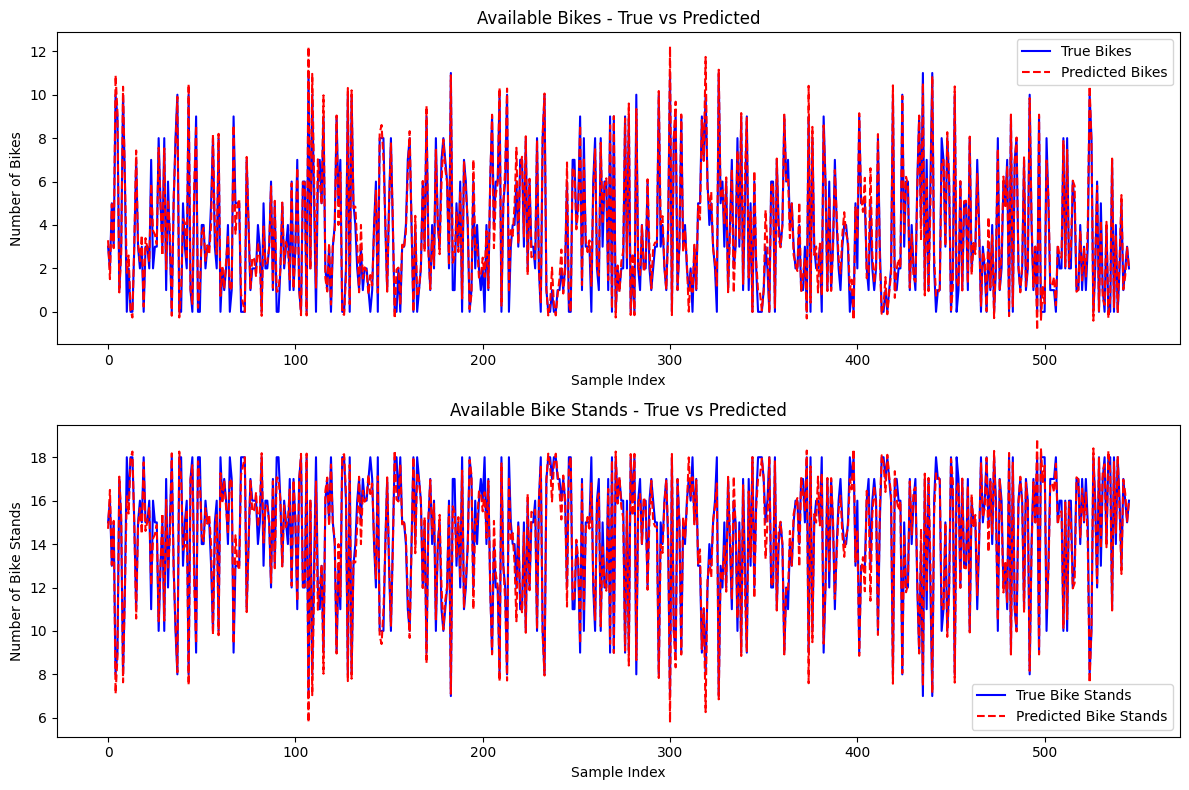

In [22]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(y_test_original, label='True Bikes', color='blue')
plt.plot(y_pred, label='Predicted Bikes', linestyle='--', color='red')
plt.title('Available Bikes - True vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bikes')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_test_stands, label='True Bike Stands', color='blue')
plt.plot(y_pred_stands, label='Predicted Bike Stands', linestyle='--', color='red')
plt.title('Available Bike Stands - True vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Number of Bike Stands')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
print("(",X_train.shape[0],",",X_train.shape[1],",",X_train.shape[2],")")

( 2182 , 1 , 11 )
